<a href="https://colab.research.google.com/github/dsdayat/HR-Employee-Attrition/blob/main/Agus_Nur_Hidayat_Script_Final_Project_HR_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goals :
- To Predict The Attrition of Valuable Employees
- To know the categories ofEmployee who in charge on Attrition
- To Know what is the problem which give attrition
- To create recomendations for the next move to decide of Attrition

In [156]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [157]:
from google.colab import drive
drive.mount ('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [158]:
dfori=pd.read_csv('/content/drive/MyDrive/dataset/HR Employee Attrition.csv')

In [159]:
df=dfori.copy()

In [160]:
df.shape

(1470, 35)

In [161]:
pd.set_option('display.max_columns', None)#to see full dataframe (non truncated)
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


## Data Pre-Processing 



In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [163]:
#1. Data Type Correction

df['Attrition']=df['Attrition'].astype('category')
df['BusinessTravel']=df['BusinessTravel'].astype('category')
df['Department']=df['Department'].astype('category')
df['EducationField']=df['EducationField'].astype('category')
df['Gender']=df['Gender'].astype('category')
df['MaritalStatus']=df['MaritalStatus'].astype('category')
df['JobRole']=df['JobRole'].astype('category')
df['Over18']=df['Over18'].astype('category')
df['OverTime']=df['OverTime'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   int64   
 11  Gender                    1470 non-null   category
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   int64 

In [164]:
df.columns.unique()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [165]:
#grouping categorical ad numerical
categoricals = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender','MaritalStatus','JobRole','Over18', 'OverTime' ]

numericals =   ['Age', 'DailyRate','DistanceFromHome', 'Education' , 'EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement', 'JobLevel',
              'JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StandardHours',
              'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']


In [166]:
#check discrete data with unique categorical data
for i in categoricals:
  print(i,df[i].unique())


Attrition ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
BusinessTravel ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']
Categories (3, object): ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
Department ['Sales', 'Research & Development', 'Human Resources']
Categories (3, object): ['Human Resources', 'Research & Development', 'Sales']
EducationField ['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']
Categories (6, object): ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other',
                         'Technical Degree']
Gender ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
MaritalStatus ['Single', 'Married', 'Divorced']
Categories (3, object): ['Divorced', 'Married', 'Single']
JobRole ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources']
Categories (9, object): 

*- There is discrete data ['Overtime'] only has 1 unique*

In [167]:
#2. Removing data which has discrete variabe
df.drop(['Over18'], axis = 1, inplace = True) #drop Over18

In [168]:
#Re-Check
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2


In [169]:
#3.a Missing Value Percentage
df.isna().sum() * 100 / len(df)

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtCompany              0.0
YearsInC

*There is no missing value*

In [170]:
#3.b Duplicated Data Check
df.duplicated().sum()

0

*There is no duplicated data*

# Data Understanding 


**Statistical Summary for Numerical**

In [232]:
df[numericals].describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


*Observation Statistical Summary for Numericals*
1. Overall the value of minimum dan maximum  each column is reasonable
2. discrete value are contain in feature ['EmployeeCount', , 'StandardHours',	'StockOptionLevel','StandardHours'] we can ignore it in the distribution
3. [DistanceFromHome],[MonthlyIncome][YearsAtCompany], mean > median, have skewed distribution
4. EmployeeNumber just a label , we can drop it and don't forget to readjust cateogorical or numerical filtering or just create new df that filtering except this feature
5. Even 'PerformanceRating' is discrete, the data still necessary for analysis

In [233]:
df.drop(['EmployeeNumber','EmployeeCount','StandardHours','HourlyRate','MonthlyRate'], axis = 1, inplace = True) #drop EmployeeNumber 

KeyError: ignored

In [ ]:
#Re-adjust grouping categorical ad numerical
categoricals = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender','MaritalStatus','JobRole', 'OverTime' ]

numericals =   ['Age','DistanceFromHome', 'Education' ,'EnvironmentSatisfaction','JobInvolvement', 'JobLevel',
              'JobSatisfaction','MonthlyIncome', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction',
              'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']


# Statistical Summary on Categoricals

In [174]:
df[categoricals].describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,MaritalStatus,JobRole,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,3,9,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Married,Sales Executive,No
freq,1233,1043,961,606,882,673,326,1054


In [175]:
(1470-1233)/1470*100

16.122448979591837

*Observation Statistical Summary for Categoricals*
- 1233 0f 1470 Employee not include in Attrition, 
- The percentage of attrition is 16.12% 
- The Categories who dominated in no Attrition are who Travel rarely in Research and Development department, has education field Life Science, *Married Men*, Has job role sales, and No Overtime

In [176]:
#detail dari categorical yang columnya banyak
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of Attrition column
No     1233
Yes     237
Name: Attrition, dtype: int64 

Value counts of BusinessTravel column
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 

Value counts of Department column
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 

Value counts of EducationField column
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 

Value counts of Gender column
Male      882
Female    588
Name: Gender, dtype: int64 

Value counts of MaritalStatus column
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64 

Value counts of JobRole column
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare 

# Bivariate Analysis on Categoricals

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


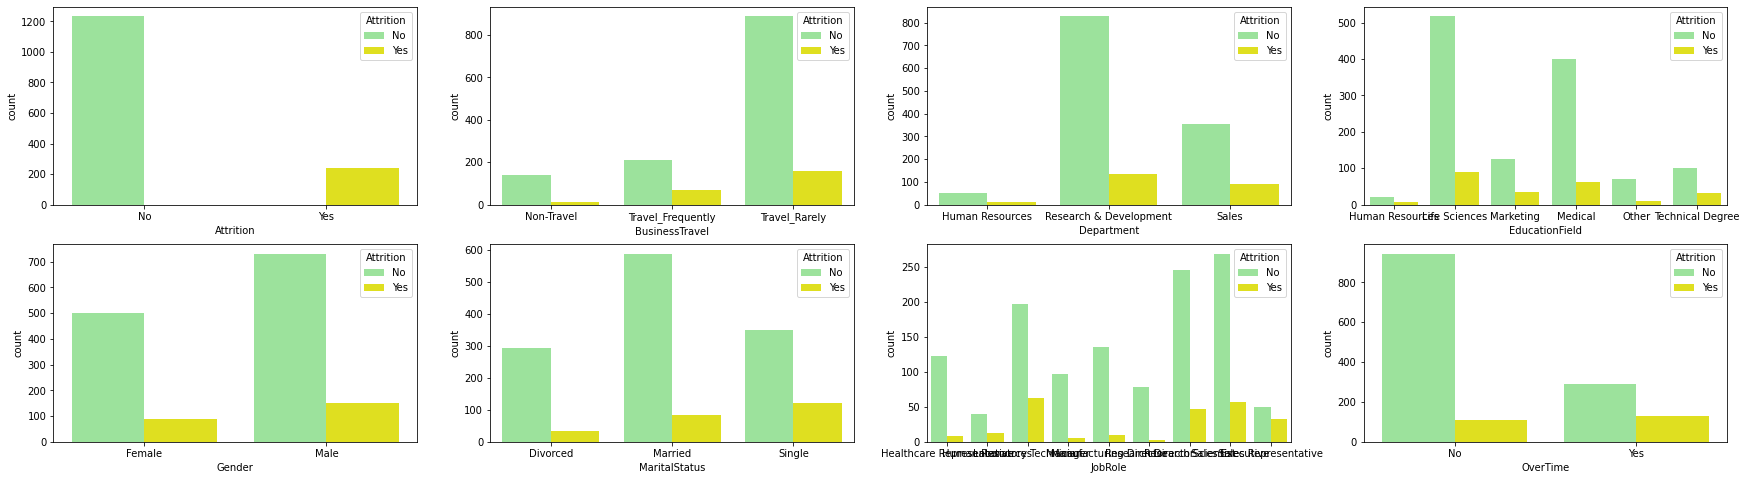

In [177]:
fig, axes =plt.subplots(2,4, figsize=(30,8))
for cat, ax in zip(categoricals, axes.flatten()):
    sns.countplot(cat, data=df, hue='Attrition',ax=ax, palette=['lightgreen','yellow'])

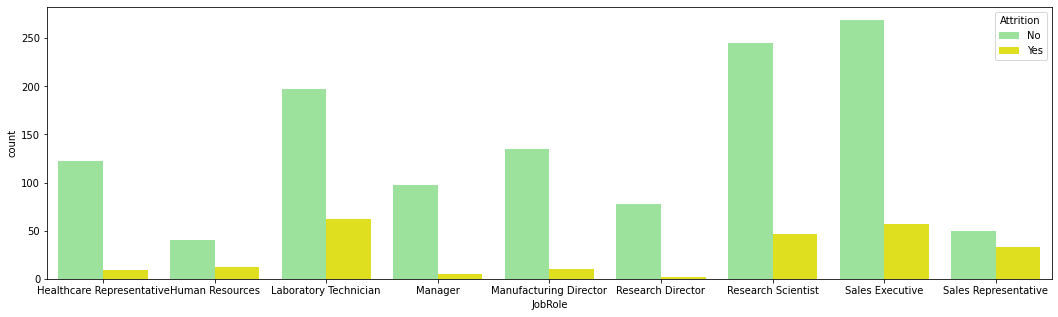

In [178]:
plt.figure(figsize=(18,5))
sns.countplot(x=df['JobRole'], hue=df['Attrition'], data=df, palette=['lightgreen','yellow'])

*Observation on Categorical Plot (Bivariate Analysis)*
- The Highest of Not Attrition is dominated by worker who travel rarely, work as Sales Executive, Research Scientist and laboratory Technician, has educational background life science and medical, Married Man, and No overtime
- In Other hand, The Attrition is dominated by employee who Travel-rarely, work in Research and Development, have life science education background, *Single Men*, has Job Role LaboratoryTechnician, Research Scientist, Sales Executive, Sales Representative, always OverTime.



Observation from Categorical

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   category
 10  JobInvolvement            1470 non-null   int64   
 11  JobLevel                  1470 non-null   int64   
 12  JobRole                   1470 non-null   category
 13  JobSatisfaction           1470 non-null   int64 

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   category
 10  JobInvolvement            1470 non-null   int64   
 11  JobLevel                  1470 non-null   int64   
 12  JobRole                   1470 non-null   category
 13  JobSatisfaction           1470 non-null   int64 

# Encoding the Categorical

In [181]:
#Tranfrom the Attrition
dummy = pd.DataFrame()
### Create Dictionary
Attrition_dict = {
    'Yes':1,
    'No':0,
}

%time df['Attrition'] = df['Attrition'].map(Attrition_dict)#%time hanya untuk melihat berapa cepat processing

CPU times: user 1.78 ms, sys: 963 µs, total: 2.75 ms
Wall time: 2.46 ms


In [182]:
#Tranfrom over time
dummy = pd.DataFrame()
### Create Dictionary
OT_dict = {
    'Yes':1,
    'No':0,
}

%time df['OverTime'] = df['OverTime'].map(OT_dict)#%time hanya untuk melihat berapa cepat processing

CPU times: user 1.56 ms, sys: 36 µs, total: 1.6 ms
Wall time: 1.44 ms


In [183]:
df['Attrition']=df['Attrition'].astype('int64')
df['OverTime']=df['OverTime'].astype('int64')

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   int64   
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   category
 10  JobInvolvement            1470 non-null   int64   
 11  JobLevel                  1470 non-null   int64   
 12  JobRole                   1470 non-null   category
 13  JobSatisfaction           1470 non-null   int64 

In [185]:
#onehot encoding 
onehot_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender','MaritalStatus','JobRole']
df = pd.get_dummies(df, columns = onehot_columns)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

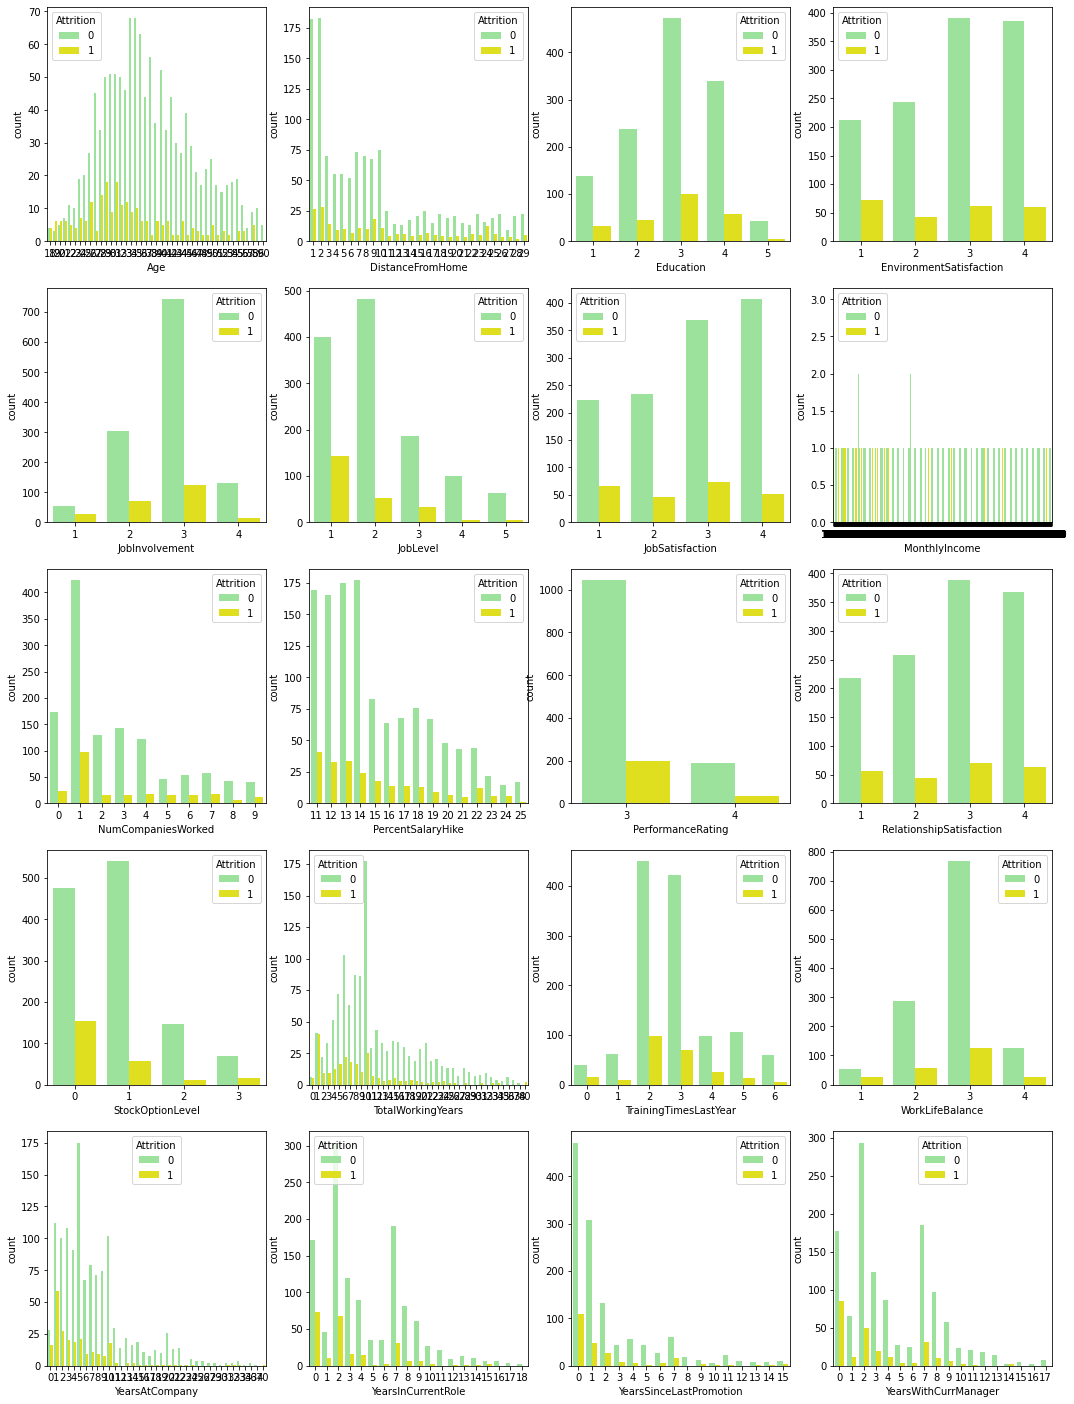

In [186]:
fig, axes =plt.subplots(5,4, figsize=(18,25))

for cat, ax in zip(numericals, axes.flatten()):
    sns.countplot(cat, data=df, hue='Attrition',ax=ax, palette=['lightgreen','yellow'])

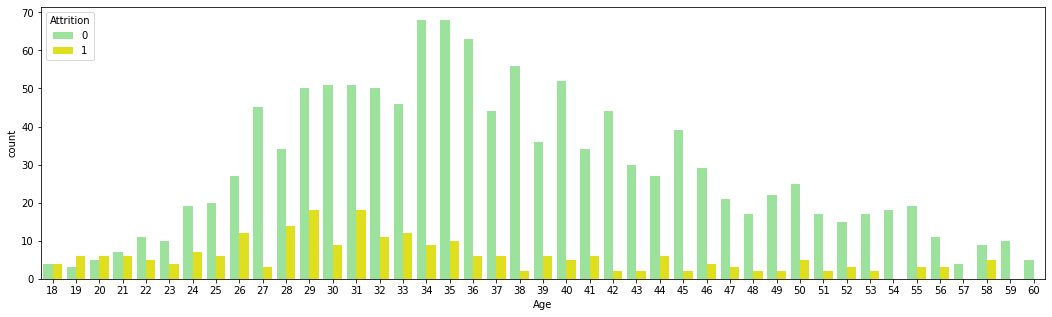

In [187]:
plt.figure(figsize=(18,5))
sns.countplot(x=df['Age'], hue=df['Attrition'], data=df, palette=['lightgreen','yellow'])

In [188]:
# Since to hard to interpret The Monthly Income , Categorize methode based on level income necessary
def lm(x):
    if x <= 2911:
        return '1'
    elif x > 2911 and x <=4919 :
        return '2'
    elif x > 4919 and x <=8379 :
        return '3'
    elif x > 8379:
        return '4'
    
df['LevelIncome'] = df['MonthlyIncome'].apply(lm)

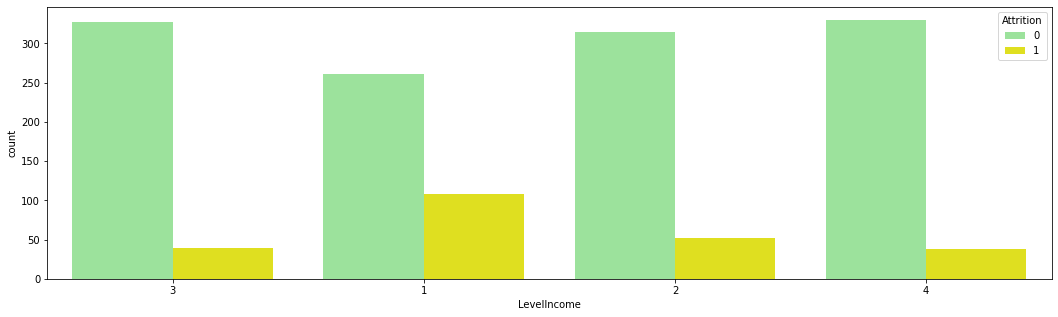

In [189]:
plt.figure(figsize=(18,5))
sns.countplot(x=df['LevelIncome'], hue=df['Attrition'], data=df, palette=['lightgreen','yellow'])

In [190]:
df.drop(['LevelIncome'], axis = 1, inplace = True) #drop Levl income cz its duplicated from monthly income

#Inference based on Bivariate Analysis Numericals

- The dominated categories which give Attrition are employee who have Bachelor degrees, Strong In Charge Job Involvement,living nearby company, Has Lower Job Level, Better Job Satifaction and Performance, Lowest Percent Salary Hike,   Working years Under or equal to 1 year, Got twice training, Better Work Life Balance, Age 29-31 y.o.



# EDA Conclussion

*   The Attrition Rate is 16.2%
*   The Attrition will be  in charge to employee who is Single, Years in Current Role Below or equal 2nd years, job level 1. Dominated by Total Working Years 1st year, Always OverTime,  dominated by age 29th yo and 31th yo, Job Role is Sales Representative 
*   Since Monthly Income is too hard to interpret, the new feature Level Income has added. Based on The data LevelIncome 1 is dominated in Attrition which means The employee which has Monthly Incume under or equal to 2911 will dominated in Attrition. 



In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  NumCompaniesWorked                 1470 non-null   int64
 11  OverTime                           1470 non-null   int64
 12  PercentSalaryHike   

# SPLIT DATA

In [193]:
# Assign 'TARGET' column to y 
y = df['Attrition']
# Assign all columns except 'TARGET' to X
X = df.drop(columns='Attrition', axis = 1)

In [195]:
#Split data into Train and Test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print("X_train dataset: ", x_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", x_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (1176, 48)
y_train dataset:  (1176,)
X_test dataset:  (294, 48)
y_test dataset:  (294,)


# KNN

In [205]:
# %%KNN Classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #set K neighbor as 3
knn.fit(x_train,y_train) #robot lagi latihan mahamin data / lagi belajar
predicted_y = knn.predict(x_test) #robotnya lagi UTS / UAS
print("KNN accuracy according to K=3 is :",knn.score(x_test,y_test))

KNN accuracy according to K=3 is : 0.826530612244898


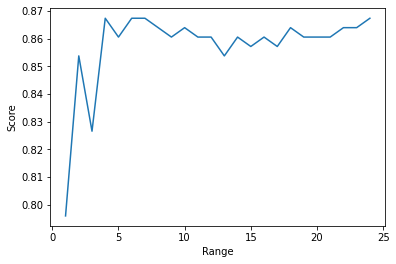

In [206]:
score_array = []
for each in range(1,25): # bisa diubah 25 atau 100 atau bebas
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(x_train,y_train)
    score_array.append(knn_loop.score(x_test,y_test))
    
plt.plot(range(1,25),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [236]:
expected_y  = y_test
predicted_y = knn.predict(x_test)

#print the result
print(metrics.classification_report(expected_y, predicted_y))
confmat = metrics.confusion_matrix(expected_y, predicted_y)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       255
           1       0.25      0.15      0.19        39

    accuracy                           0.83       294
   macro avg       0.56      0.54      0.55       294
weighted avg       0.79      0.83      0.81       294



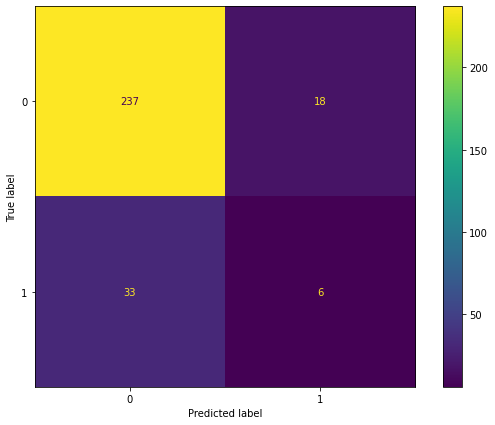

In [231]:
# the confusion matrix of knn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn.predict(x_test)

cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn.classes_)
disp.plot(ax=ax)
plt.show()

# Light GBM Classifier Model

In [197]:
#Insert Library
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import lightgbm as ltb

In [215]:
#call the model
lgbm_model = ltb.LGBMClassifier();
lgbm_model.fit(x_train, y_train)
print(); print(lgbm_model)
accuracy_lgbm = lgbm_model.score(x_test,y_test)
print("LGBM accuracy is :",accuracy_lgbm)



LGBMClassifier()
LGBM accuracy is : 0.8775510204081632


In [234]:
expected_y  = y_test
predicted_y = lgbm_model.predict(x_test)

#print the result
print(metrics.classification_report(expected_y, predicted_y))
confmat = metrics.confusion_matrix(expected_y, predicted_y)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       255
           1       0.60      0.23      0.33        39

    accuracy                           0.88       294
   macro avg       0.75      0.60      0.63       294
weighted avg       0.85      0.88      0.85       294



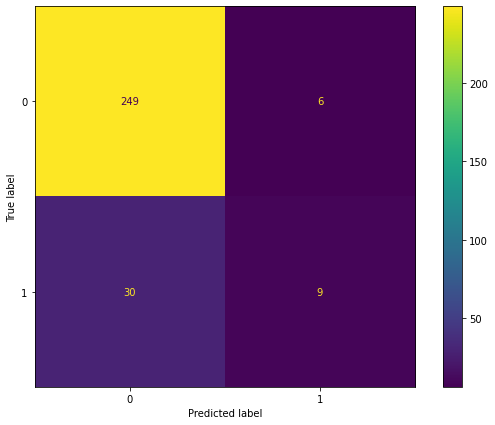

In [235]:
# the confusion matrix of lgbm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = lgbm_model.predict(x_test)

cm = confusion_matrix(y_test, y_pred, labels=lgbm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=lgbm_model.classes_)
disp.plot(ax=ax)
plt.show()

# Decision Tree Classification

In [200]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
accuracy_dt = dt_model.score(x_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7687074829931972


In [220]:
expected_y  = y_test
predicted_y = dt_model.predict(x_test)

#print the result
print(metrics.classification_report(expected_y, predicted_y))
confmat = metrics.confusion_matrix(expected_y, predicted_y)

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       255
           1       0.24      0.33      0.28        39

    accuracy                           0.77       294
   macro avg       0.56      0.58      0.57       294
weighted avg       0.80      0.77      0.78       294



# Random Forest

In [201]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf_model_initial = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf_model_initial.fit(x_train,y_train)
print("Random Forest accuracy for 1000 trees is :",rf_model_initial.score(x_test,y_test))

Random Forest accuracy for 1000 trees is : 0.8741496598639455


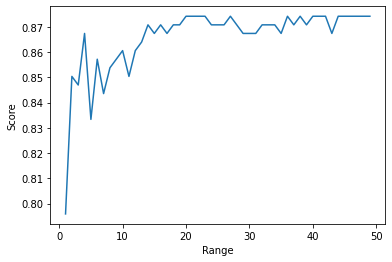

In [208]:
score_array = []
for each in range(1,50):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state =42) #set K neighbor as 3
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))
    
plt.plot(range(1,50),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [222]:
expected_y  = y_test
predicted_y = rf_model_initial.predict(x_test)

#print the result
print(metrics.classification_report(expected_y, predicted_y))
confmat = metrics.confusion_matrix(expected_y, predicted_y)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



# Randome Forest SMOTE

In [ ]:
# import needed libraries 
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# define pipeline
combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('o', over), ('u', under), ('model', combined_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
pipeline.fit(x_train, y_train)
evaluate(pipeline, x_test, y_test)


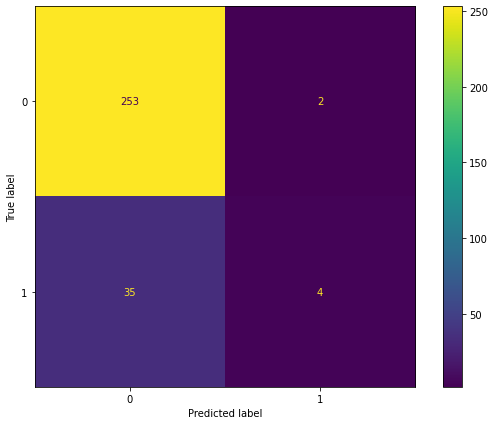

In [227]:
# the confusion matrix of rf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_model_initial.predict(x_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_model_initial.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_model_initial.classes_)
disp.plot(ax=ax)
plt.show()

# Naive Bayes

In [204]:
#Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
accuracy_nb = nb_model.score(x_test,y_test)
print("Naive Bayes accuracy is :",accuracy_nb)

Naive Bayes accuracy is : 0.7278911564625851


In [223]:
expected_y  = y_test
predicted_y = nb_model.predict(x_test)

#print the result
print(metrics.classification_report(expected_y, predicted_y))
confmat = metrics.confusion_matrix(expected_y, predicted_y)

              precision    recall  f1-score   support

           0       0.93      0.75      0.83       255
           1       0.27      0.62      0.37        39

    accuracy                           0.73       294
   macro avg       0.60      0.68      0.60       294
weighted avg       0.84      0.73      0.77       294



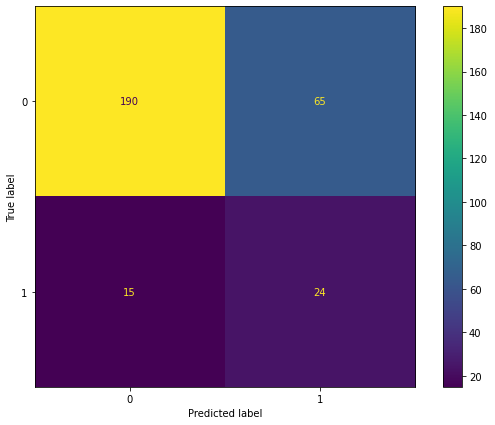

In [230]:
# the confusion matrix of nb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = nb_model.predict(x_test)

cm = confusion_matrix(y_test, y_pred, labels=nb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=nb_model.classes_)
disp.plot(ax=ax)
plt.show()